In [30]:
# load data.csv into pandas

import pandas as pd

data = pd.read_csv('data.csv', delimiter=';')
# convert target to numeric
# Dropout -> 0, Enrolled -> 1, Graduate -> 2
data['Target'] = data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 1})

X = data.drop('Target', axis=1)
y = data['Target']

print(X.head())
print(y.shape)

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [31]:
# classfication with random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
# cross validation
from sklearn.model_selection import cross_val_score

# score accuracy, precision, recall, f1
scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print(scores)
print("accuracy: ", scores.mean())

scores = cross_val_score(rf, X, y, cv=10, scoring='precision_weighted')
print(scores)
print("precision: ", scores.mean())

scores = cross_val_score(rf, X, y, cv=10, scoring='recall_weighted')
print(scores)
print("recall: ", scores.mean())

scores = cross_val_score(rf, X, y, cv=10, scoring='f1_weighted')
print(scores)
print("f1: ", scores.mean())


[0.87810384 0.88939052 0.88487585 0.89164786 0.88235294 0.8438914
 0.87104072 0.88235294 0.8438914  0.86651584]
accuracy:  0.8734063307559523
[0.87885955 0.8887171  0.88429914 0.8927232  0.88150916 0.84186843
 0.87044127 0.88493009 0.84112814 0.86792484]
precision:  0.8732400939272459
[0.87810384 0.88939052 0.88487585 0.89164786 0.88235294 0.8438914
 0.87104072 0.88235294 0.8438914  0.86651584]
recall:  0.8734063307559523
[0.87420675 0.88711737 0.88221993 0.88843121 0.87979415 0.84249041
 0.86739601 0.87786169 0.84029845 0.86122043]
f1:  0.8701036384422591


In [32]:
# visualize the result with confusion matrix and ROC curve

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[220  96]
 [ 29 540]]


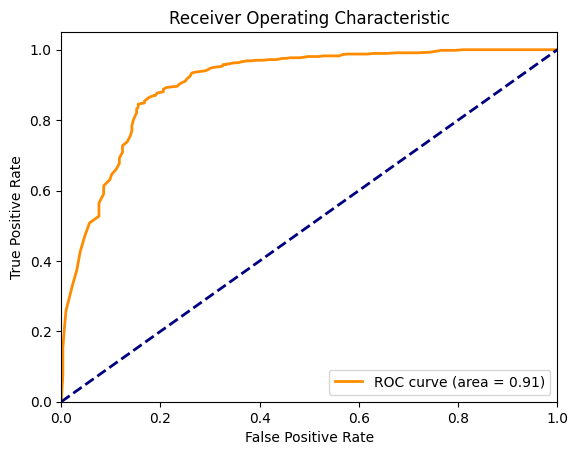

In [34]:
# build a ROC curve with different settings of decision tree
# then plot the ROC curve: false positive rate vs true positive rate

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


